# Problem 1: **Dimensionality Reduction**

# **`Task 1 „“Dataset preparation“ (5 Scores)`**

*Read the data from your individual variant into Python notebook*

In [ ]:
# Import some libraries for Data preprocessing
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving wisc_bc_data.csv to wisc_bc_data (3).csv


In [ ]:
df = pd.read_csv('wisc_bc_data.csv')

*Output the main information (number of variables, number of instances).*

In [ ]:
# Number of variables
Number_of_Variables = df.shape[0]

# Number of instances
Number_of_Instances = df.shape[1]

print('Number of variables:', Number_of_Variables)
print('Number of instances:', Number_of_Instances)

Number of variables: 569
Number of instances: 32


In [ ]:
# info() function can give us also the main information of the data that we have
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

*The Data has 569 Observations and 32 variables. It seems that the data probably don't contain missing values.*

*Output some first rows of the dataset.*


In [ ]:
# head() function to output the first rows
df.head(10) # The number 10 gives us the first 10 rows

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


*Make explanatory data analyses for each variable (mean, std, etc.).*

In [ ]:
# Describe() function gives us the main statistical information about the data
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


*The target variable **diagnosis** contain two classes. It can be considerer as a binary classification.*

In [ ]:
# Output the variance of each variable
variance = df.var()
print(variance)

id                         1.563015e+16
radius_mean                1.241892e+01
texture_mean               1.849891e+01
perimeter_mean             5.904405e+02
area_mean                  1.238436e+05
smoothness_mean            1.977997e-04
compactness_mean           2.789187e-03
concavity_mean             6.355248e-03
concave points_mean        1.505661e-03
symmetry_mean              7.515428e-04
fractal_dimension_mean     4.984872e-05
radius_se                  7.690235e-02
texture_se                 3.043159e-01
perimeter_se               4.087896e+00
area_se                    2.069432e+03
smoothness_se              9.015114e-06
compactness_se             3.207029e-04
concavity_se               9.111982e-04
concave points_se          3.807242e-05
symmetry_se                6.833290e-05
fractal_dimension_se       7.001692e-06
radius_worst               2.336022e+01
texture_worst              3.777648e+01
perimeter_worst            1.129131e+03
area_worst                 3.241674e+05


<ipython-input-80-58fbbb3c5e16>:2: FutureWarning:

The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



*separate independent and target
variables.*

In [ ]:
# The dependent variable in our dataset is diagnosis
Y = df[['diagnosis']]

# Output the shape of the dependent variable
Y.shape

(569, 1)

In [ ]:
# The independent variavles are all the remaining columns
X = df.drop(['diagnosis'], axis= "columns")

# Output the shape of the independent variables
X.shape

(569, 31)

*The target variable, **dignosis** has a dimension of (569, 1), meaning there are 569 observations with one possible vaules, either 'M'(malignant) or 'B' (benign). The independent variables, with a dimension of (569, 31), are the features that might help predict the target variable. It'is reasonable to assume that this is a biinary classification problem.*

*Look at data types of the variables. Are there any categorical variable you need to encode? Execute necessary transformations. Drop some columns if necessary, when recommended in your individual variant.*

In [ ]:
# Encode the target variable using label encoding
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
Y_encoded1 = encoder.fit_transform(Y)

# Convert the encoded array back to a Dataframe
Y_encoded = pd.DataFrame(Y_encoded1, index = Y.index, columns = Y.columns )

Y_encoded.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



,diagnosis
0,1
1,1
2,1
3,1
4,1


*In this case, the target variable **diagnosis** has two categories. **M** will take label **1** and **B** will take label **0**.*

In [ ]:
# Drop the id column
X = X.drop('id', axis= "columns")
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


*Fill non-available values with the mean value*

In [ ]:
X.isnull().sum()[np.where(X.isnull().sum() != 0)[0]]

Series([], dtype: int64)

*There are no Nan values in our dataset.*

In [ ]:
# Concat the data to use it in Task 2
df_preprocessed = pd.concat([X, Y_encoded], axis=1)

*Check the dependences between each of the independent variable and the target variable and among the independent variables.  Output correlation table and corresponding headmap results.*

In [ ]:
# Correlation table betweem independent variable and dependent variable
data = X.copy()
data['diagnosis'] = Y_encoded

correlation_table = data.corr()['diagnosis']
correlation_table

radius_mean                0.730029
texture_mean               0.415185
perimeter_mean             0.742636
area_mean                  0.708984
smoothness_mean            0.358560
compactness_mean           0.596534
concavity_mean             0.696360
concave points_mean        0.776614
symmetry_mean              0.330499
fractal_dimension_mean    -0.012838
radius_se                  0.567134
texture_se                -0.008303
perimeter_se               0.556141
area_se                    0.548236
smoothness_se             -0.067016
compactness_se             0.292999
concavity_se               0.253730
concave points_se          0.408042
symmetry_se               -0.006522
fractal_dimension_se       0.077972
radius_worst               0.776454
texture_worst              0.456903
perimeter_worst            0.782914
area_worst                 0.733825
smoothness_worst           0.421465
compactness_worst          0.590998
concavity_worst            0.659610
concave points_worst       0

<function matplotlib.pyplot.show(close=None, block=None)>

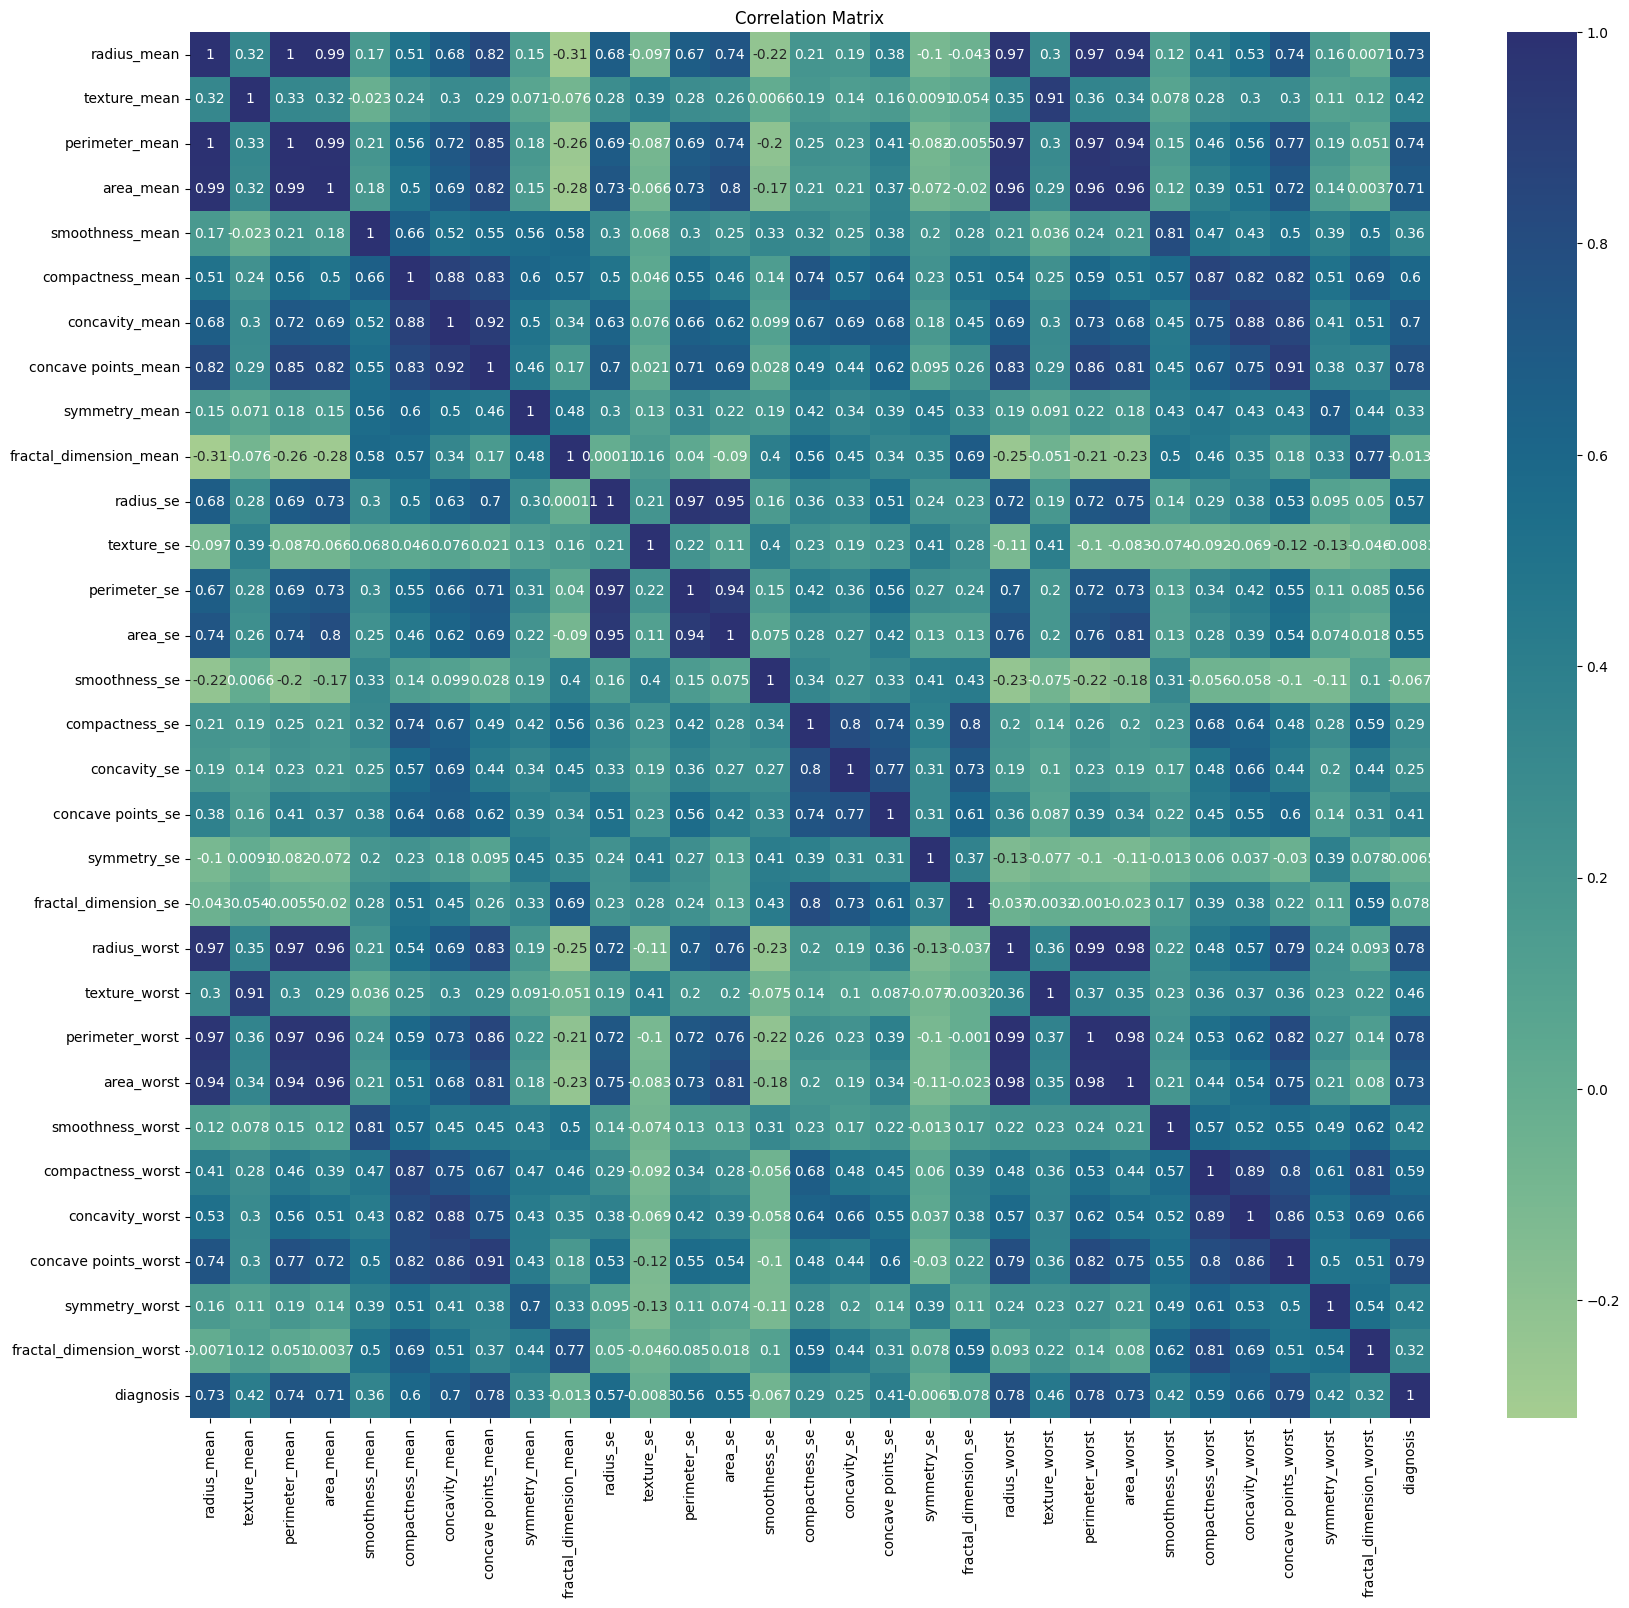

In [ ]:
# Correlation matrix with headmap among independent variables
import seaborn as sns
import matplotlib.pyplot as plt

correlation_all = data.corr()
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_all, annot= True, cmap= 'crest', square= False)
plt.title('Correlation Matrix')
plt.show

*The **concave point_mean** (**0.776**), **perimeter_worst** (**0.782**), and **concave points_worst** (**0.793**) have the strongest positive correlation with the target variable. These features might be particularly important in prediction the target variables.*

*Most of the features have a positive correlation with the target variable, meaning that as the value of the feature increases, the likelihood of the target variable being **M** (encoded as 1) also increases.*

*The **fractal_diemnsion_mean** (**-0.0128**), **texture_se** (**-0.0083**), and **symmetry_se** (**-0.0065**) have very weak negative correlations with the target variable compared to the other features.*

*There are some features that are highly correlated with each other, it is an indication of multicollinearity. It can cause problems in some machine learning models*

*It is important to note that correlation coefficients only capture linear relationships between variables and do not account for any potential nonlinear relationships. Additionally, correlation does not imply causation.*

*Scale the data with Minmax scaler*

In [ ]:
# Scaling the data with Standard scaler
from sklearn.preprocessing import StandardScaler

# Independent Variables
standardscaler_X = StandardScaler()
standardscaled_X = standardscaler_X.fit_transform(X)
scaledstand_X_df = pd.DataFrame(standardscaled_X, columns = X.columns)
X_df_standard = scaledstand_X_df

print('Standard Scaled Independent Variables:')
print(X_df_standard.head())

Standard Scaled Independent Variables:
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   fractal_dimension_mean  ...  radius_worst  texture

# **`Task 2 “PCA” (15 Scores)`**

Construct two PCA plots with 2 and 3 components. Which part of the variance is described? Make a
plot, which shows dependency between the number of used components and the explained
variance. Use “plotly.express” library and “scatter_3d” and “scatter” plots for all PCA and tSNE plots
in this and next tasks. Divide the data into 2 classes taken the target variable into account and show
the values with different colors at the previous plots (tSNE and PCA). If you have a classification
problem, then use target variable as a color. If you have a regression problem, then divide the values
of target variable into two parts (e.g., target_variable<limit_value: one color, other values – some
different color). Experiment with different limit_values to have some reasonable separation on the
plot. Use “from sklearn.decomposition import PCA” library for PCA.

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA

# PCA with 2 components
pca2 = PCA(n_components=2)
principalComponents2 = pca2.fit_transform(X_df_standard)

# PCA with 3 Components
pca3 = PCA(n_components=3)
principalComponents3 = pca3.fit_transform(X_df_standard)

# Variance explained
print('Explained variance by 2 components: {}'.format(pca2.explained_variance_ratio_.sum()))
print('Explained variance by 3 components: {}'.format(pca3.explained_variance_ratio_.sum()))

# DataFrame for the PCA results
df_pca2 = pd.DataFrame(data = principalComponents2, columns = ['PC 1', 'PC 2'])
df_pca2['Target'] = Y

df_pca3 = pd.DataFrame(data = principalComponents3, columns = ['PC 1', 'PC 2', 'PC 3'])
df_pca3['Target'] = Y

Explained variance by 2 components: 0.6324320765155949
Explained variance by 3 components: 0.7263637090898981


In [ ]:
# Plot PCA with 2 components
fig_2d = px.scatter(df_pca2, x='PC 1', y='PC 2', color='Target', title=f'Total Explained Variance: {pca2.explained_variance_ratio_.sum()*100}%')
fig_2d.show()

In [ ]:
# Plot PCA with 3 components
fig_3d_pca = px.scatter_3d(df_pca3, x='PC 1', y='PC 2', z='PC 3', color='Target', title=f'Total Explained Variance: {pca3.explained_variance_ratio_.sum()*100}%')
fig_3d_pca.show()


In [ ]:
# Explained variance plot for different numbers components
pca_all = PCA()
pca_all.fit(X_df_standard)

explained_var = np.cumsum(pca_all.explained_variance_ratio_)
px.line(x = range(1, len(explained_var) + 1), y=explained_var, labels={'x':'Number of components', 'y':'Cumulative Explained Variance'})

*PCA is a dimesionality reduction method that seeks to explain variance in a dataset by identifying components along which the variance is maximized.*

*As we increase the number of components in PCA, we add essentially more dimensions along which the data varies. This means we are able to capture more of the overall variablity in the dataset, which is why the explained variance increases with more components.*

*Howerver, not all components are equally important. The first few components typically capture most of the varianc, and additional components add less and less new information. This is why the plot of cumulative explained variance versus number of components shows a sharp increase at first, followed by a plateau.*

# **`Task 3 “tSNE” (15 Scores)`**

Construct two tSNE plots with 2 and 3 components. Experiment with different parameter values
(perplexity, number of iterations, etc.). Show these plots. Use “from sklearn.manifold import TSNE”
library for tSNE.

**With perplexity=30 and 1000 iterations**

In [ ]:
from sklearn.manifold import TSNE

# Start with these values of parameters
perplexity = 30
n_iteration = 1000

# 2D tSNE
tsne2 = TSNE(n_components=2, perplexity=perplexity, n_iter=n_iteration, random_state=42)
X_tsne2 = tsne2.fit_transform(X_df_standard)

df_tsne2 = pd.DataFrame(data=X_tsne2, columns=['Component 1', 'Component 2'])
df_tsne2['Target'] = Y

fig2d = px.scatter(df_tsne2, x='Component 1', y='Component 2', color='Target')
fig2d.show()

In [ ]:
# 3D tSNE
tsne3 = TSNE(n_components=3, perplexity=perplexity, n_iter=n_iteration, random_state=42)
X_tsne3 = tsne3.fit_transform(X_df_standard)

df_tsne3 = pd.DataFrame(data=X_tsne3, columns=['Component 1', 'Component 2', 'Component 3'])
df_tsne3['Target'] = Y

fig3d_tsne = px.scatter_3d(df_tsne3, x='Component 1', y='Component 2', z='Component 3', color='Target')
fig3d_tsne.show()

**With perplexity=50 and 2000 iterations**

In [ ]:
perplexity2 = 50
n_iteration2 = 2000

# 2D tSNE
tsne22 = TSNE(n_components=2, perplexity=perplexity2, n_iter=n_iteration2, random_state=42)
X_tsne22 = tsne22.fit_transform(X_df_standard)

df_tsne22 = pd.DataFrame(data=X_tsne22, columns=['Component 1', 'Component 2'])
df_tsne22['Target'] = Y

fig2d = px.scatter(df_tsne22, x='Component 1', y='Component 2', color='Target')
fig2d.show()

In [ ]:
# 3D tSNE
tsne32 = TSNE(n_components=3, perplexity=perplexity2, n_iter=n_iteration2, random_state=42)
X_tsne32 = tsne32.fit_transform(X_df_standard)

df_tsne32 = pd.DataFrame(data=X_tsne32, columns=['Component 1', 'Component 2', 'Component 3'])
df_tsne32['Target'] = Y

fig3d_tsne32 = px.scatter_3d(df_tsne32, x='Component 1', y='Component 2', z='Component 3', color='Target')
fig3d_tsne32.show()

**With perplexity=80 and 3000 iterations**

In [ ]:
perplexity3 = 80
n_iteration3 = 3000

# 2D tSNE
tsne23 = TSNE(n_components=2, perplexity=perplexity3, n_iter=n_iteration3, random_state=42)
X_tsne23 = tsne23.fit_transform(X_df_standard)

df_tsne23 = pd.DataFrame(data=X_tsne23, columns=['Component 1', 'Component 2'])
df_tsne23['Target'] = Y

fig2d = px.scatter(df_tsne23, x='Component 1', y='Component 2', color='Target')
fig2d.show()

In [ ]:
# 3D tSNE
tsne33 = TSNE(n_components=3, perplexity=perplexity3, n_iter=n_iteration3, random_state=42)
X_tsne33 = tsne33.fit_transform(X_df_standard)

df_tsne33 = pd.DataFrame(data=X_tsne33, columns=['Component 1', 'Component 2', 'Component 3'])
df_tsne33['Target'] = Y

fig3d_tsne33 = px.scatter_3d(df_tsne33, x='Component 1', y='Component 2', z='Component 3', color='Target')
fig3d_tsne33.show()

*We notice that when we increase the number of iteration and perplexity, the separation of the classes becomes worst.*

# Problem 2: **Cluster Analysis**

# **`Task 1 ““kMeans Clustering” (15 Scores)`**

Perform k-means clustering. With the elbow method find the best number of clusters (dependency
between the number of clusters and explained variance, see lecture slides). Visualise the results of
the elbow method. Visualise the results of kMeans clustering at PCA and tSNE plots with different
colors for each class. Visualise for both 2D and 3D plots. Is there any possible meaning for the
obtained clusters? Use “from sklearn.cluster import KMeans” library for K-means method.

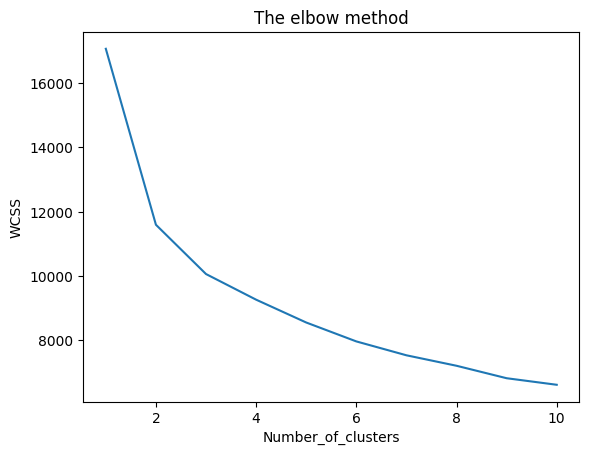

In [ ]:
# Optimum number of clusters for kMeans classifier
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++',  max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(X_df_standard)
  wcss.append(kmeans.inertia_)

# Plot the results into a line graph
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number_of_clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Perform KMeans with the optimal number of clusters
optimal_k = 2 # best number of clusters
kmeans = KMeans(n_clusters=optimal_k,  max_iter = 300, n_init = 10, random_state=0)
kmeans.fit(X_df_standard)

# Get the cluster labels
labels = kmeans.labels_

**Visualise for PCA 2D**

In [ ]:
# Add the labels of the clustering for kMeans algorithm to the PCA and tSNE dataframes
df_pca2['Cluster'] = labels
df_pca3['Cluster'] = labels
df_tsne2['Cluster'] = labels
df_tsne3['Cluster'] = labels

# Plot KMeans clusters on 2D PCA plot
fig_pca_2d = px.scatter(df_pca2, x='PC 1', y='PC 2', color='Cluster', title=f'Total Explained Variance: {pca2.explained_variance_ratio_.sum()*100}%')
fig_pca_2d.show()

**Visualise for PCA 3D**

In [ ]:
# Plot KMeans clusters on 3D PCA plot
fig_pca_3d_kmeans = px.scatter_3d(df_pca3, x='PC 1', y='PC 2', z='PC 3', color='Cluster', title=f'Total Explained Variance: {pca3.explained_variance_ratio_.sum()*100}%')
fig_pca_3d_kmeans.show()

**Visualise for tSNE 2D**

In [ ]:
# Plot kMeans clusters on 2D tSNE plot
fig_tsne_2d = px.scatter(df_tsne2, x='Component 1', y='Component 2', color='Cluster')
fig_tsne_2d.show()

**Visualise for tSNE 3D**

In [ ]:
# Plot kMeans clusters on 2D tSNE plot
fig_tsne_3d_kmeans = px.scatter_3d(df_tsne3, x='Component 1', y='Component 2', z='Component 3', color='Cluster')
fig_tsne_3d_kmeans.show()

*Having an elbow at **k=2** makes intuitive snese beceause we have in our data two classes. If the data is relatively cleany divided into two groups along some dimensions captured by the features, the th **k=2** k-means clustering might well capture this division, yielding a significant drop in WCSS and hence an elbow in the graph.*

*However, seeing another elbow at **k=3** might suggest that one (or possibly both) of the classes isn't uniform but rather consists of two distinct subgroups. This might not impact a classification task as the labels remain binary.*

*Regrarding the explained variance, we notice that we get the same values as before performing kMeans algorithm. The PCA step is completely independent of the kMeans clustering step.*


# **`Task 2 ““Hierarchical clustering” (15 Scores)`**

Cluster your data with single, complete and ward methods. Visualise the dendrogram and make
conclusions about recommended number of clusters.
Visualise the clustering results at PCA and tSNE plots. Compare clustering results of different
hierarchical and kmean methods, output results of each clustering as a column of results pandas
DataFrame. Name the columns accordingly. Use “from scipy.cluster.hierarchy import dendrogram,
linkage” library for hierarchical clustering.

In [ ]:
from scipy.cluster.hierarchy import linkage

linkage_single = linkage(X_df_standard, method = 'single')
linkage_complete = linkage(X_df_standard, method = 'complete')
linkage_ward = linkage(X_df_standard, method = 'ward')


**Single Linkage**

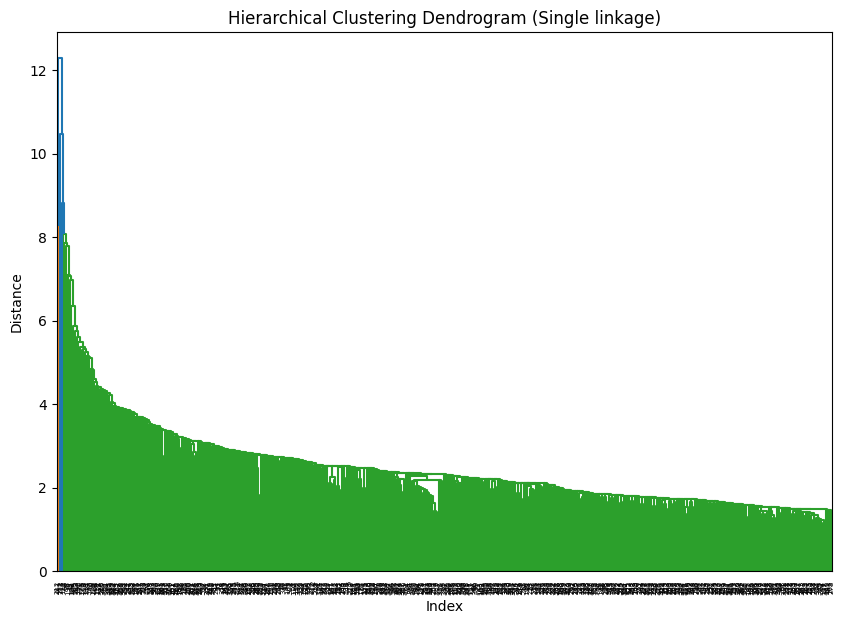

In [ ]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(10, 7))

# Single Linkage
dendrogram_single = dendrogram(linkage_single)
plt.title('Hierarchical Clustering Dendrogram (Single linkage)')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

*The **Single Linkage**: In single linkage hierarchical clustering, the distance between two clusters is defined the shortest distance between two points in each cluster. That is the reason why the plot seems not logical.*

**Complete Linkage**

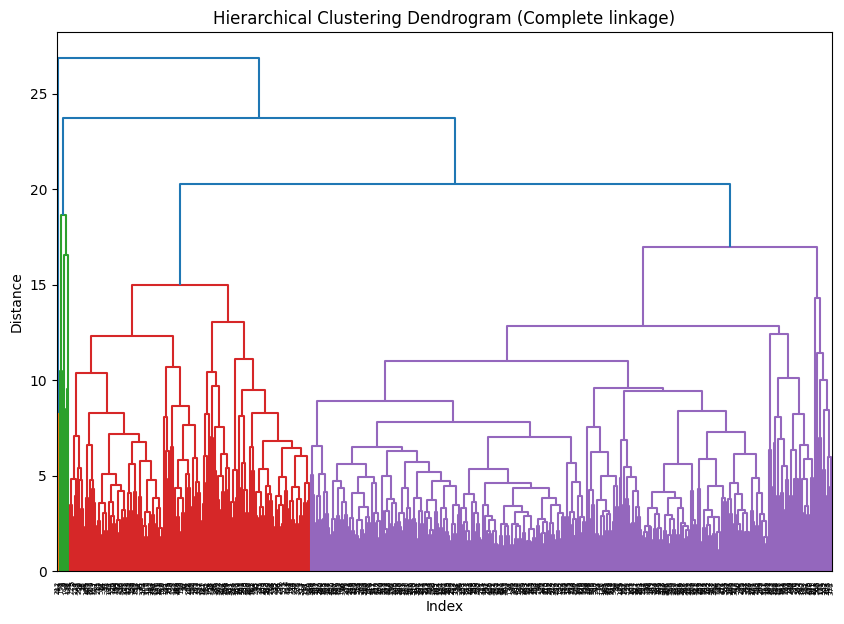

In [ ]:
# Complete Linkage
plt.figure(figsize=(10, 7))
dendrogram_complete = dendrogram(linkage_complete)
plt.title('Hierarchical Clustering Dendrogram (Complete linkage)')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

*The **Complete Linkage**: In Complete Linkage hierarchical clustering, the distance between two clusters is defined as the longest distance between two points in each cluster.*

**Ward Linkage**

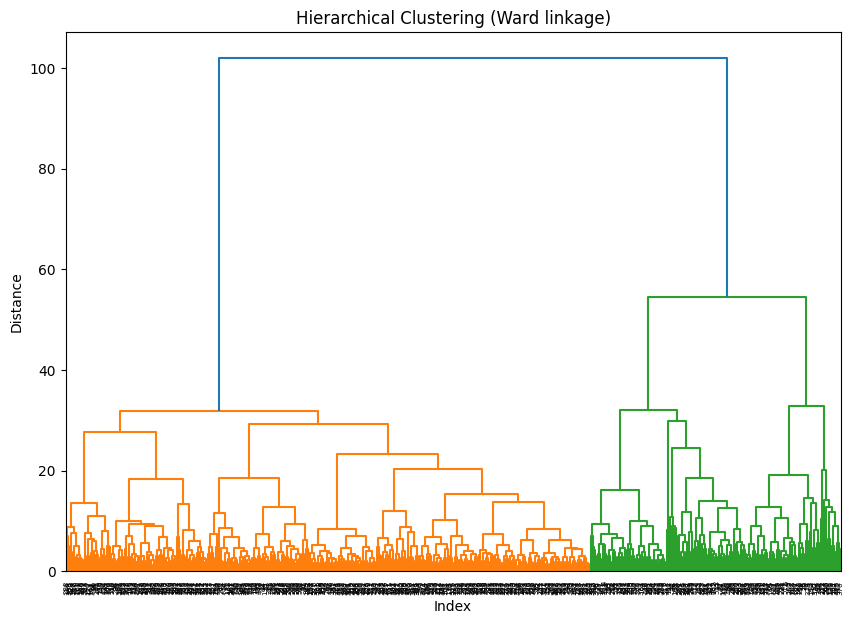

In [ ]:
# Ward Linkage
plt.figure(figsize=(10, 7))
dendrogram_ward = dendrogram(linkage_ward)
plt.title('Hierarchical Clustering (Ward linkage)')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

*The **Ward's Method** : in Ward's method, the distance between two clusters is the sum of squares between the two clusters.*

In [ ]:
# Perform Hierarchical clustering
from sklearn.cluster import AgglomerativeClustering

df_results = pd.DataFrame()

cluster_single = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
cluster_complete = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
cluster_ward = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

# Get the labels
labels_single = cluster_single.fit_predict(X_df_standard)
labels_complete = cluster_complete.fit_predict(X_df_standard)
labels_ward = cluster_ward.fit_predict(X_df_standard)

df_results['Single'] = labels_single
df_results['Complete'] = labels_complete
df_results['Ward'] = labels_ward
df_results['KMeans'] = labels #KMeans labels


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



**PCA and tSNE for Single Linkage**

In [ ]:
df_pca2['Single'] = labels_single
df_pca2['Complete'] = labels_complete
df_pca2['ward'] = labels_ward

df_tsne2['Single'] = labels_single
df_tsne2['Complete'] = labels_complete
df_tsne2['Ward'] = labels_ward

# Plot Hierarachical clusters on 2D PCA plot for single linkage

fig_pca_2d_single = px.scatter(df_pca2, x='PC 1', y='PC 2', color='Single', title=f'Total Explained Variance: {pca2.explained_variance_ratio_.sum()*100}%')
fig_pca_2d_single.show()

fig2d_tsne_single = px.scatter(df_tsne2, x='Component 1', y='Component 2', color='Single', title = 'tSNE for Single Linkage')
fig2d_tsne_single.show()

In [ ]:
# Plot Hierarachical clusters on 3D PCA plot for single linkage

df_pca3['Single'] = labels_single
df_pca3['Complete'] = labels_complete
df_pca3['ward'] = labels_ward

df_tsne3['Single'] = labels_single
df_tsne3['Complete'] = labels_complete
df_tsne3['Ward'] = labels_ward

fig_pca_3d_single = px.scatter_3d(df_pca3, x='PC 1', y='PC 2', z='PC 3', color='Single', title=f'Total Explained Variance: {pca3.explained_variance_ratio_.sum()*100}%')
fig_pca_3d_single.show()

fig3d_tsne_single = px.scatter_3d(df_tsne3, x='Component 1', y='Component 2', z='Component 3', color='Single', title = 'tSNE for Single Linkage')
fig3d_tsne_single.show()

**The 3D plot of PCA does not appear beceause of the limits of plots in a single notebook.**

**PCA and tSNE for Complete Linkage**

In [ ]:
# Plot Hierarachical clusters on 2D PCA plot for Complete linkage

fig_pca_2d_Complete = px.scatter(df_pca2, x='PC 1', y='PC 2', color='Complete', title=f'Total Explained Variance: {pca2.explained_variance_ratio_.sum()*100}%')
fig_pca_2d_Complete.show()

fig2d_tsne_complete = px.scatter(df_tsne2, x='Component 1', y='Component 2', color='Complete', title = 'tSNE for Complete Linkage')
fig2d_tsne_complete.show()

In [ ]:
# Plot Hierarachical clusters on 3D PCA plot for Complete linkage

fig_pca_3d_complete = px.scatter_3d(df_pca3, x='PC 1', y='PC 2', z='PC 3', color='Complete', title=f'Total Explained Variance: {pca3.explained_variance_ratio_.sum()*100}%')
fig_pca_3d_complete.show()

fig3d_tsne_complete = px.scatter_3d(df_tsne3, x='Component 1', y='Component 2', z='Component 3', color='Complete', title = 'tSNE for Complete Linkage')
fig3d_tsne_complete.show()

**PCA and tSNE for ward linkage**

In [ ]:
# Plot Hierarachical clusters on 2D PCA plot for Complete linkage

fig_pca_2d_ward = px.scatter(df_pca2, x='PC 1', y='PC 2', color='ward', title=f'Total Explained Variance: {pca2.explained_variance_ratio_.sum()*100}%')
fig_pca_2d_ward.show()

fig2d_tsne_ward = px.scatter(df_tsne2, x='Component 1', y='Component 2', color='Ward', title = 'tSNE for ward Linkage')
fig2d_tsne_ward.show()

In [ ]:
# Plot Hierarachical clusters on 3D PCA plot for Ward linkage

fig_pca_3d_ward = px.scatter_3d(df_pca3, x='PC 1', y='PC 2', z='PC 3', color='ward', title=f'Total Explained Variance: {pca3.explained_variance_ratio_.sum()*100}%')
fig_pca_3d_ward.show()

fig3d_tsne_ward = px.scatter_3d(df_tsne3, x='Component 1', y='Component 2', z='Component 3', color='Ward', title = 'tSNE for Ward Linkage')
fig3d_tsne_ward.show()

In [ ]:
df_results.head(50)

,Single,Complete,Ward,KMeans
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,2,0,1
4,0,0,0,1
5,0,0,0,1
6,0,0,0,1
7,0,0,0,1
8,0,0,0,1
9,0,2,0,1


In [ ]:
display(df_results)

,Single,Complete,Ward,KMeans
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,2,0,1
4,0,0,0,1
...,...,...,...,...
564,0,0,0,1
565,0,0,0,1
566,0,0,0,1
567,0,0,0,1


# **`Task 3 “DBScan clustering” (15 Scores)`**

Cluster your data with DBScan method. Experiment with different parameters. Visualise the results
with PCA and tSNE plots. Add the clustering results to results DataFrame. Compare the results with
previous clustering methods. Make conclusions how many object are similarly clustered. Use “from
sklearn.cluster import DBSCAN” library for BDScan clustering.

**Trying with eps=0.5 min_samples=5**

In [ ]:
from sklearn.cluster import DBSCAN

# DBSCAN clustering
dbscan1 = DBSCAN(eps=0.5, min_samples=5)
dbscan1_labels = dbscan1.fit_predict(X_df_standard)

df_pca2['DBSCAN1'] = dbscan1_labels
df_pca3['DBSCAN1'] = dbscan1_labels
df_tsne2['DBSCAN1'] = dbscan1_labels
df_tsne3['DBSCAN1'] = dbscan1_labels

# Plot Clusters on 2D PCA and tSNE plota for DBSCAN

fig_pca_2d_dbscan = px.scatter(df_pca2, x='PC 1', y='PC 2', color='DBSCAN1', title=f'Total Explained Variance: {pca2.explained_variance_ratio_.sum()*100}%')
fig_pca_2d_dbscan.show()

fig2d_tsne_dbscan = px.scatter(df_tsne2, x='Component 1', y='Component 2', color='DBSCAN1', title = 'tSNE for DBSCAN')
fig2d_tsne_dbscan.show()

*We notice that with these parameters, the algorithm label all the observation as **-1** (outliers). The model classify all the data as noise. We might to reconsider the parameters for DBSCAN.*

**The 3D plot of PCA does not appear beceause of the limits of plots in a single notebook.**

**Trying with eps=5 min_samples=30**

In [ ]:
# DBSCAN clustering
dbscan2 = DBSCAN(eps=5, min_samples=30)
dbscan2_labels = dbscan2.fit_predict(X_df_standard)

df_pca2['DBSCAN2'] = dbscan2_labels
df_pca3['DBSCAN2'] = dbscan2_labels
df_tsne2['DBSCAN2'] = dbscan2_labels
df_tsne3['DBSCAN2'] = dbscan2_labels

# Plot Clusters on 2D PCA and tSNE plota for DBSCAN

fig_pca_2d_dbscan = px.scatter(df_pca2, x='PC 1', y='PC 2', color='DBSCAN2', title=f'Total Explained Variance: {pca2.explained_variance_ratio_.sum()*100}%')
fig_pca_2d_dbscan.show()

fig2d_tsne_dbscan = px.scatter(df_tsne2, x='Component 1', y='Component 2', color='DBSCAN2', title = 'tSNE for DBSCAN')
fig2d_tsne_dbscan.show()

*We notice a slight improvement*

**Trying with eps=4 min_samples=20**

In [ ]:
# DBSCAN clustering
dbscan3 = DBSCAN(eps=4, min_samples=25)
dbscan3_labels = dbscan3.fit_predict(X_df_standard)

df_pca2['DBSCAN3'] = dbscan3_labels
df_pca3['DBSCAN3'] = dbscan3_labels
df_tsne2['DBSCAN3'] = dbscan3_labels
df_tsne3['DBSCAN3'] = dbscan3_labels

# Plot Clusters on 2D PCA and tSNE plota for DBSCAN

fig_pca_2d_dbscan = px.scatter(df_pca2, x='PC 1', y='PC 2', color='DBSCAN3', title=f'Total Explained Variance: {pca2.explained_variance_ratio_.sum()*100}%')
fig_pca_2d_dbscan.show()

fig2d_tsne_dbscan = px.scatter(df_tsne2, x='Component 1', y='Component 2', color='DBSCAN3', title = 'tSNE for DBSCAN')
fig2d_tsne_dbscan.show()

In [ ]:
# Plot Clusters on 3D PCA and tSNE plota for DBSCAN

fig_pca_3d_dbscan3 = px.scatter_3d(df_pca3, x='PC 1', y='PC 2', z='PC 3', color='DBSCAN3', title=f'Total Explained Variance: {pca3.explained_variance_ratio_.sum()*100}%')
fig_pca_3d_dbscan3.show()

fig3d_tsne_dbscan3 = px.scatter_3d(df_tsne3 , x='Component 1', y='Component 2', z='Component 3', color='DBSCAN3', title = 'tSNE for DBSCAN')
fig3d_tsne_dbscan3.show()

**Trying with eps=3.2 min_samples=25**

In [ ]:
# DBSCAN clustering
dbscan4 = DBSCAN(eps=3.2, min_samples=25)
dbscan4_labels = dbscan4.fit_predict(X_df_standard)

df_pca2['DBSCAN4'] = dbscan4_labels
df_pca3['DBSCAN4'] = dbscan4_labels
df_tsne2['DBSCAN4'] = dbscan4_labels
df_tsne3['DBSCAN4'] = dbscan4_labels

# Plot Clusters on 2D PCA and tSNE plota for DBSCAN

fig_pca_2d_dbscan = px.scatter(df_pca2, x='PC 1', y='PC 2', color='DBSCAN4', title=f'Total Explained Variance: {pca2.explained_variance_ratio_.sum()*100}%')
fig_pca_2d_dbscan.show()

fig2d_tsne_dbscan = px.scatter(df_tsne2, x='Component 1', y='Component 2', color='DBSCAN4', title = 'tSNE for DBSCAN')
fig2d_tsne_dbscan.show()

In [ ]:
# Plot Clusters on 3D PCA and tSNE plota for DBSCAN

fig_pca_3d_dbscan4 = px.scatter_3d(df_pca3, x='PC 1', y='PC 2', z='PC 3', color='DBSCAN4', title=f'Total Explained Variance: {pca3.explained_variance_ratio_.sum()*100}%')
fig_pca_3d_dbscan4.show()

fig3d_tsne_dbscan4 = px.scatter_3d(df_tsne3 , x='Component 1', y='Component 2', z='Component 3', color='DBSCAN4', title = 'tSNE for DBSCAN')
fig3d_tsne_dbscan4.show()

*We consider the DBSCAN with eps=3.2 min_samples=25*

In [ ]:
# Inserting the results of the DBSCAN to the DataFrame
df_results['DBSCAN'] = dbscan4_labels
display(df_results)

,Single,Complete,Ward,KMeans,DBSCAN
0,0,0,0,1,-1
1,0,0,0,1,0
2,0,0,0,1,-1
3,0,2,0,1,-1
4,0,0,0,1,-1
...,...,...,...,...,...
564,0,0,0,1,-1
565,0,0,0,1,-1
566,0,0,0,1,0
567,0,0,0,1,-1


*For the DBSCAN, we notice that the the second class is designed as outliers with -1. But they seem to be classified as 1 for the other algorithms.*

# **`Task 4 “Reduced dataset clustering” (20 Scores)`**

Select the number of components in PCA plot so, that the percentage of explained variance is more
than 85%. Use the clustering methods of tasks 1-3 for the reduced feature set and compare with the
results obtained with the whole feature set. Add the clustering results to the DataFrame with results.
Make conclusions how many object are similarly clustered.

In [ ]:
# Defining the number of PCA components needed to explain ober 85% of the variance
explained_var = np.cumsum(pca_all.explained_variance_ratio_)
n_over_85 = next(x[0] for x in enumerate(explained_var) if x[1] > 0.85)



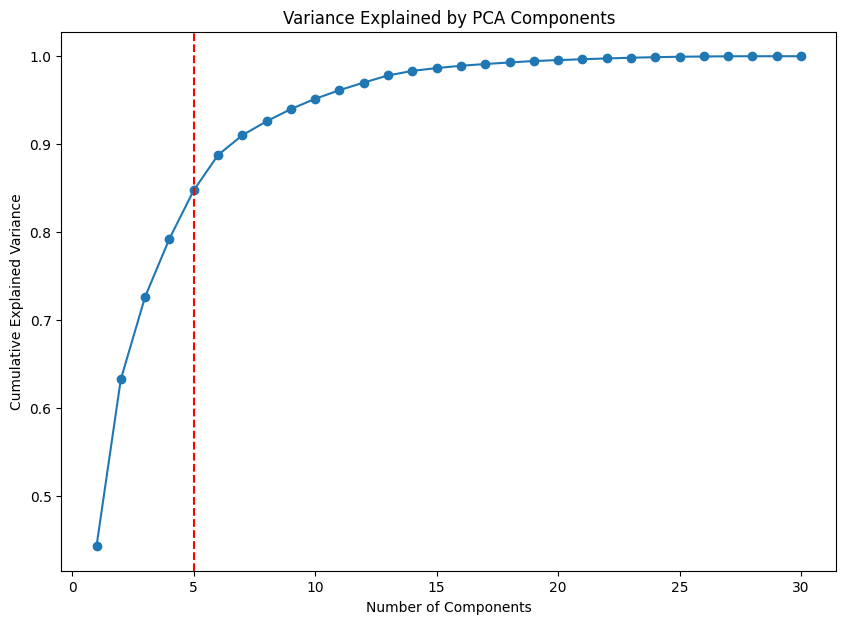

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(range(1, len(explained_var) + 1), explained_var, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Variance Explained by PCA Components')

# Add a vertical line at the optimal number of components
plt.axvline(x=n_over_85, color='r', linestyle='--')
plt.show()

*We notice that the minimum number of components needed to explain more than 85% of the variance is 5 components.*

In [ ]:
# Fit PCA using optimal number if components, we take 6
pca_optimal = PCA(n_components=6)
X_pca_optimal = pca_optimal.fit_transform(X_df_standard)

In [ ]:
# KMeans
kmeans_optimal = KMeans(n_clusters=2, max_iter = 300, n_init = 10, random_state=0)
kmeans_optimal.fit(X_pca_optimal)
labels_kmeans_optimal = kmeans_optimal.labels_

# DBSCAN
dbscan_optimal = DBSCAN(eps=3.2, min_samples=25)
dbscan_optimal.fit(X_pca_optimal)
labels_dbscan_optimal = dbscan_optimal.labels_

# Hierarchical Clustering
cluster_ward_optimal = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster_ward_optimal.fit(X_pca_optimal)
labels_ward_optimal = cluster_ward_optimal.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



In [ ]:
# Store the new results in the dataframe
df_results['KMeans_reduced'] = labels_kmeans_optimal
df_results['DBSCAN_reduced'] = labels_dbscan_optimal
df_results['Ward_optimal'] = labels_ward_optimal
df_results['Original'] = Y_encoded
df_results

,Single,Complete,Ward,KMeans,DBSCAN,KMeans_reduced,DBSCAN_reduced,Ward_optimal,Original
0,0,0,0,1,-1,1,-1,0,1
1,0,0,0,1,0,1,0,0,1
2,0,0,0,1,-1,1,0,0,1
3,0,2,0,1,-1,1,-1,0,1
4,0,0,0,1,-1,1,0,0,1
...,...,...,...,...,...,...,...,...,...
564,0,0,0,1,-1,1,-1,0,1
565,0,0,0,1,-1,1,0,0,1
566,0,0,0,1,0,1,0,1,1
567,0,0,0,1,-1,1,-1,0,1


In [ ]:
# Check the similarity of the cluster before and after reduction
df_results['KMeans_Same'] = df_results['KMeans'] == df_results['KMeans_reduced']
df_results['DBSCAN_Same'] = df_results['DBSCAN'] == df_results['DBSCAN_reduced']
df_results['Ward_Same'] = df_results['Ward'] == df_results['Ward_optimal']

In [ ]:
print('Similarly clustered in KMeans:', df_results['KMeans_Same'].sum())
print('Similarly clustered in DBSCAN:', df_results['DBSCAN_Same'].sum())
print('Similarly clustered in Ward:', df_results['Ward_Same'].sum())

Similarly clustered in KMeans: 564
Similarly clustered in DBSCAN: 477
Similarly clustered in Ward: 543


*For **KMeans**: Out of all the instances, 564 of them were assigned to the same clusters in both original and reduced dimensionality.*
*For **DBSCAN**: 477 instances were assigned to the same clusters in both cases.*
*For **Ward** method of hierarchica Clustering: 543 instances maintained their cluster assignment.*

It appears that all the three methods are fairly robust, with KMeans and Ward showing higher similarity between the original and reduced dimensions.*